# Άσκηση 3
Μέθοδος Gauss Hermite

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
def y(x):
    return x + 2*(x**2)-(x**3)+4*(x**4)-3*(x**5)
#we define the function y under the integral

In [28]:
#Hermite - Gauss matrix of values
def valuesX(n):
    if n == 2:
        xi = [-0.70710678,0.70710678]
        return xi
    if n == 4:
        xi = [-1.65068012,-0.52464762,1.65068012, 0.52464762]
        return xi
    if n == 6:
        xi = [-2.35060497,-1.33584907,-0.43607741,2.35060497, 1.33584907, 0.43607741,]
        return xi
    else:
        print("I'm sorry, I don't know the values of xi")

def valuesA(n):
    if n == 2:
        Ai = [0.88622693]
        return Ai
    if n==4:
        Ai = [0.08131284,0.80491409]
        return Ai
    if n==6:
        Ai = [0.00453001,0.15706732,0.72462960]
        return Ai
    else:
        print("I'm sorry, I don't know the values of Ai")

In [29]:
#Now the method to calculate the integral
def HG(n):
    Ai = valuesA(n)
    xi = valuesX(n)
    result = 0
    i = 0
    while i<n:
        for j in range(0,len(Ai)):
            print(Ai[j], "and", xi[i])
            result = result + Ai[j]*y(xi[i])
            i=i+1
            
    return result


In [32]:
#Let's try the method now

I2 = HG(2)
print("For 2 points we get:", I2)

I4 = HG(4)
print("For 4 points we get:", I4)

I6 = HG(6)
print("For 6 points we get:", I6)

0.88622693 and -0.70710678
0.88622693 and 0.70710678
For 2 points we get: 3.544907702154599
0.08131284 and -1.65068012
0.80491409 and -0.52464762
0.08131284 and 1.65068012
0.80491409 and 0.52464762
For 4 points we get: 7.08981565074285
0.00453001 and -2.35060497
0.15706732 and -1.33584907
0.7246296 and -0.43607741
0.00453001 and 2.35060497
0.15706732 and 1.33584907
0.7246296 and 0.43607741
For 6 points we get: 7.089815352635704


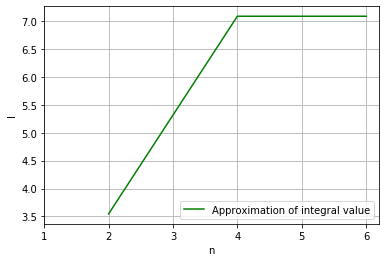

In [37]:
I = [I2,I4,I6]
n = [2,4,6]
plt.plot(n,I,color ='green', label ="Approximation of integral value")
plt.grid(True)
plt.xticks([1,2,3,4,5,6])
plt.xlabel('n')
plt.ylabel('I')
plt.legend()
plt.show()

In [39]:
#Calculate rate of convergence:
rate = (I4-I2)/(I6-I4)
print("The rate of convergence is calculated to be:", rate)

The rate of convergence is calculated to be: -11891388.736467497


In [42]:
#knowing that this rate is supposedly almost equal to 2^a we can calculated said a
ln2 = np.log(2)
a = np.log(abs(rate))/ln2
print("The error is of magnitude:", a)

The error is of magnitude: 23.503413874351406


# Άσκηση 4
Runge Kutra 4ης Τάξης

In [74]:
def yy(x,y):
    a = np.exp(y)
    yy = (x-np.exp(x))/(y+a)
    return yy

In [85]:
def RK(h,x):
    yn = 0
    xn = 0
    n = int(1/h)
    X = [xn]
    Y = [yn]
    
    if x<0:
        h = -h

    for i in range (0,n):
        k1 = h*yy(xn,yn)
        k2 = h*yy(xn+(h/2),yn+(k1/2))
        k3 = h* yy(xn+(h/2),yn+(k2/2))
        k4 = h*yy(xn+h,yn+k3)
        yn = yn +((1/6)*(k1+2*k2+2*k3+k4))
        xn = xn + h
        
        X.append(xn)
        Y.append(yn)
       
    return yn

Let's try it out. First for x = 1

In [86]:
print("For h = 1/50 we get:")
print(RK(1/50,1))
print("\nFor h = 1/100 we get:")
print(RK(1/100,1))
print("\nAnd finally, for h = 1/200 we get:")
print(RK(1/200,1))

For h = 1/50 we get:
-2.237120434529838

For h = 1/100 we get:
-0.3831741434760199

And finally, for h = 1/200 we get:
-1.4386506253625384


While for x = -1

In [81]:
print("For h = 1/50 we get:")
print(RK(1/50,-1))
print("\nFor h = 1/100 we get:")
print(RK(1/100,-1))
print("\nAnd finally, for h - 1/200 we get:")
print(RK(1/200,-1))

For h = 1/50 we get:
0.6520749830944439

For h = 1/100 we get:
0.6520749818537084

And finally, for h - 1/200 we get:
0.6520749817781245


Convergence


In [82]:
def conv(x):
    I1 = RK(1/50,x)
    I2 = RK(1/100,x)
    I3 = RK(1/200,x)
    return (I2-I1)/(I3-I2)

print("For x = 1:")
print(conv(1))
print("\nFor x = -1:")
print(conv(-1))

For x = 1:
-1.7565017533504346

For x = -1:
16.41534726108587


# Άσκηση 2
Μέθοδος Filon - Μέθοδος Simpson

In [313]:
def Gauss(Matrix,co,n):
    
    sol = np.zeros(n)
    a = np.zeros((n,n+1))
                
                
    for i in range(0,n):
        for j in range(0,n):
            a[i][j] = Matrix[i][j]
    for i in range(0,n):
        a[i][n] = co[i]
        
    for i in range(0,n):
        if Matrix[i][i] == 0:
            
            #This is dividing by zero. We can't do this.
            break
        
        for j in range(i+1, n):
            
            #let's fix the matrix up a little
            r = a[j][i]/a[i][i]
        
            for k in range(0,n+1):
                a[j][k] = a[j][k] - r * a[i][k]
                
    sol[n-1] = a[n-1][n]/a[n-1][n-1]
    #basically this is the xn = bn/ann
    #now we will go backwards (a is now an upper trigonal matrix)
    for i in range(n-2,-1,-1):
        sol[i] = a[i][n]
    
        for j in range(i+1,n):
            sol[i] = sol[i] - a[i][j]*sol[j]
    
        sol[i] = sol[i]/a[i][i]

    A=[]   
    print('The required solution is: ')
    for i in range(0,n):
        print('A',i+1,'=', (sol[i]))
        A.append((sol[i]))
    return A

In [309]:
l = math.pi
S = [[1,1,1,1,1],[0,18*l,36*l,54*l,72*l],[0,(18*l)**2,(36*l)**2,(54*l)**2,(72*l)**2],[0,(18*l)**3,(36*l)**3,(54*l)**3,(72*l)**3],[0,(18*l)**4,(36*l)**4,(54*l)**4,(72*l)**4]]
B = [0,-72*l,-5184*(l**2),432*l-373248*(l**3),62208*(l**2)-26873856*(l**4)]


In [310]:
A = Gauss(S,B,5)

The required solution is: 
A 1 = 0.9993745605948029
A 2 = 0.0012508788103914408
A 3 = 9.101341204944997e-15
A 4 = -0.0012508788104040592
A 5 = -0.9993745605947993


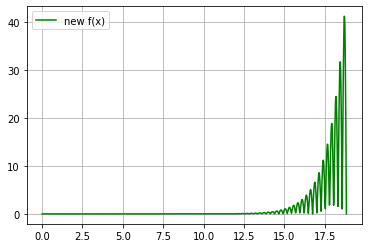

In [311]:
def f(x):
    f = 12*np.exp((x/12)-15)
    return f
def g(x):
    g = np.exp(x-15)*np.sin(12*x)
    return g

xpoints = np.linspace(0,6*math.pi,1000) 
gpoints = abs(g(xpoints))

plot1 = plt.plot(xpoints, gpoints, color ='green', label ="new f(x)")
plt.grid(True)
plt.legend()
plt.show(plot1)

Basically to find the integral's value:

In [312]:
def Filon(A):
    #remember the value of l
    result = A[0]*f(0)+A[1]*f(18*l)+A[2]*f(36*l)+A[3]*f(54*l)+A[4]*f(72*l)
    print("The result is:")
    print(result)
Filon(A)
                                                                    

The result is:
-563.3201816599219


In [277]:
def Simpson(n):
    sum = 0
    m = n-1
    #m is the subintervals now
    #step:
    h = 6*l/m
    print("h =",h)
    #creating lists for the solution's progretion and the points
    sol =[]
    xn=[0]
    gx = [g(0)]
    #filling the list of xs (points)
    for j in range(1,n):
        xn.append(xn[j-1]+h)
        gx.append(g(xn[j]))
        
    
    
    print("The value of f at the end is:", g(6*math.pi))
    #method
    
    i = 1
    while i <= (m-1):
        #n = 5 --> m = 4 --> so i from 1 to 3 (twice)
        sum = sum + 4*gx[i]
        i = i + 2
            
    i = 2
    while i<=(m-2):
        #n=5 --> m = 4 --> so i runs from 2 to 2 (once)
        sum = sum + 2*gx[i]
        i = i + 2
        
    sum = gx[0]+gx[m]    
    print("The sum of f(x)s before we multiply with h/3 is:", sum)
    solution = sum*h/3
    
    print("For", n, "points, the solution is:", solution)



In [278]:
sol5 = Simpson(5)

h = 4.71238898038469
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -4.141753449797219e-13
For 5 points, the solution is: -6.505851105431563e-13


In [279]:
sol10 = Simpson(11)

h = 1.8849555921538759
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -4.141753449797219e-13
For 11 points, the solution is: -2.602340442172625e-13


In [280]:
sol500 = Simpson(501)

h = 0.03769911184307752
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -4.141753449797219e-13
For 501 points, the solution is: -5.20468088434525e-15


In [281]:
sol1000 = Simpson(1001)

h = 0.01884955592153876
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.6941217236807657e-11
For 1001 points, the solution is: 1.0644480722804742e-13


In [282]:
sol2000 = Simpson(2001)

h = 0.00942477796076938
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -1.7769567926765988e-11
For 2001 points, the solution is: -5.5824744056192834e-14


In [283]:
sol100000 = Simpson(100001)

h = 0.0001884955592153876
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -2.2478317628259712e-08
For 100001 points, the solution is: -1.4123543505199731e-12


#other way to write the method
    #for j in range(1,int((n-1)/2) + 1):
        #n = 5 --> this runs until j = 2
        sum = sum + 4*g(xn[2*i-1])
    #for j in range(1,int((n-3)/2)):
        #n = 5 --> this runs until j=1
        sum = sum + 2*g(xn[2*i])
    #sum = sum + g(xn[0])+g(xn[n-1])

In [285]:
#Let's rewrite it for the interval (15,6pi) where f is mostly non zero
def Simpson2(n):
    sum = 0
    m = n-1
    #m is the subintervals now
    #step:
    h = (6*l-15)/m
    print("h =",h)
    #creating lists for the solution's progretion and the points
    sol =[]
    xn=[0]
    gx = [g(0)]
    #filling the list of xs (points)
    for j in range(1,n):
        xn.append(xn[j-1]+h)
        gx.append(g(xn[j]))
        
    
    
    print("The value of f at the end is:", g(6*math.pi))
    #method
    
    i = 1
    while i <= (m-1):
        #n = 5 --> m = 4 --> so i from 1 to 3 (twice)
        sum = sum + 4*gx[i]
        i = i + 2
            
    i = 2
    while i<=(m-2):
        #n=5 --> m = 4 --> so i runs from 2 to 2 (once)
        sum = sum + 2*gx[i]
        i = i + 2
        
    sum = gx[0]+gx[m]    
    print("The sum of f(x)s before we multiply with h/3 is:", sum)
    solution = sum*h/3
    
    print("For", n, "points, the solution is:", solution)

In [292]:
#Let us repeat
s5 = Simpson2(5)

h = 0.9623889803846897
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.1511685914587214e-05
For 5 points, the solution is: 3.6929065566161274e-06


In [293]:
s10 = Simpson2(11)

h = 0.38495559215387587
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.1511685914587214e-05
For 11 points, the solution is: 1.4771626226464508e-06


In [294]:
s500 = Simpson2(501)

h = 0.007699111843077517
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.1511685914585056e-05
For 501 points, the solution is: 2.954325245292348e-08


In [295]:
s1000 = Simpson2(1001)

h = 0.0038495559215387587
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.1511685914584507e-05
For 1001 points, the solution is: 1.4771626226461036e-08


In [296]:
s2000 = Simpson2(2001)

h = 0.0019247779607693793
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.151168591458422e-05
For 2001 points, the solution is: 7.385813113230334e-09


In [297]:
s100000 = Simpson2(100001)

h = 3.849555921538759e-05
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 1.151168591431095e-05
For 100001 points, the solution is: 1.4771626226110014e-10


not helpful

In [298]:
def Simpson3(n):
    sum = 0
    m = n-1
    #m is the subintervals now
    #step:
    h = 6*l/m
    print("h =",h)
    #creating lists for the solution's progretion and the points
    sol =[]
    xn=[0]
    gx = [g(0)]
    #filling the list of xs (points)
    for j in range(1,n):
        xn.append(xn[j-1]+h)
        gx.append(g(xn[j]))
        
    i = 0
    while i<=m-2:
        sum = sum +gx[i]+4*gx[i+1]+gx[i+2]
        i = i+2
        #this is the only way to link what we wrote while solving problems 
        #and mr Stergioulas' notes
    
    print("The value of f at the end is:", g(6*math.pi))
    #method
    
    
    print("The sum of f(x)s before we multiply with h/3 is:", sum)
    solution = sum*h/3
    
    print("For", n, "points, the solution is:", solution)


In [299]:
ss5 = Simpson3(5)

h = 4.71238898038469
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -4.373640067547288e-13
For 5 points, the solution is: -6.870097752826263e-13


In [300]:
ss10 = Simpson3(11)

h = 1.8849555921538759
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: 15.305199501830014
For 11 points, the solution is: 9.616540463335067


In [301]:
ss500 = Simpson3(501)

h = 0.03769911184307752
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -309.4184820378245
For 501 points, the solution is: -3.8882673202197395


In [302]:
ss1000 = Simpson3(1001)

h = 0.01884955592153876
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -618.700590716089
For 1001 points, the solution is: -3.8874104611306612


In [303]:
ss2000 = Simpson3(2001)

h = 0.00942477796076938
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -1237.3844458757217
For 2001 points, the solution is: -3.8873578848294446


In [304]:
ss100000 = Simpson3(100001)

h = 0.0001884955592153876
The value of f at the end is: -4.141753449797219e-13
The sum of f(x)s before we multiply with h/3 is: -61869.166767288996
For 100001 points, the solution is: -3.887354395996738
